In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")

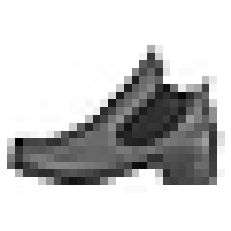

In [11]:
import matplotlib.pyplot as plt
train_data_x = train_data.values[:,1:]
test_data_x = test_data.values[:,1:]
plt.imshow(train_data_x[1].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

In [4]:
label_map = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
train_data_y = []
train_data_y_string = []
for y in train_data.values[:,:1]:
    train_data_y.append(y[0])
    train_data_y_string.append(label_map[y[0]])
print(train_data_y_string[1])

boot


In [5]:
train_data_x_tiny = train_data_x[:10000]
train_data_y_tiny = train_data_y[:10000]

from sklearn.svm import SVC
svc = SVC()
svc.fit(train_data_x_tiny, train_data_y_tiny)

SVC()

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, train_data_x_tiny, train_data_y_tiny, cv=3, scoring="accuracy")

array([0.85572885, 0.85328533, 0.84668467])

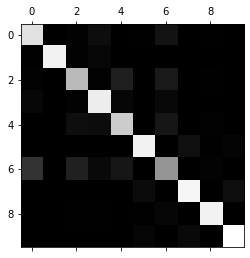

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(svc, train_data_x_tiny, train_data_y_tiny, cv=3)
conf = confusion_matrix(train_data_y_tiny, predict)
plt.matshow(conf, cmap=plt.cm.gray)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 5, 8], 'weights': ['uniform', 'distance']}
]

neighbor = KNeighborsClassifier()
grid_search = GridSearchCV(neighbor, param_grid, cv=3, return_train_score=True)
grid_search.fit(train_data_x_tiny, train_data_y_tiny)
print(grid_search.best_params_)
print(grid_search.best_score_)
final_model = grid_search.best_estimator_

{'n_neighbors': 5, 'weights': 'distance'}
0.8149999763023693


In [9]:
cross_val_score(final_model, train_data_x_tiny, train_data_y_tiny, cv=3, scoring="accuracy")

array([0.81523695, 0.81218122, 0.81758176])

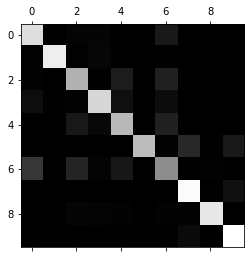

In [10]:
predict = cross_val_predict(final_model, train_data_x_tiny, train_data_y_tiny, cv=3)
conf = confusion_matrix(train_data_y_tiny, predict)
plt.matshow(conf, cmap=plt.cm.gray)
plt.show()

## Ensemble Learning (voting)

In [12]:
test_data_y = []
for y in test_data.values[:,:1]:
    test_data_y.append(y[0])

In [13]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(random_state=42)
estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
for estimator in estimators:
    estimator.fit(train_data_x_tiny, train_data_y_tiny)
    print(estimator.score(test_data_x, test_data_y))

0.8542
0.8554
0.7492
0.8274


In [15]:
from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("mlp_clf", mlp_clf),
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(train_data_x_tiny, train_data_y_tiny)
print(voting_clf.score(test_data_x, test_data_y))

0.8567


In [16]:
voting_clf.voting = "soft"
print(voting_clf.score(test_data_x, test_data_y))

0.8567
